In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [45]:
dataset = pd.read_csv("pima-indians-diabetes.data.csv")
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


There are 768 observations with 8 input variables and 1 output variable.

The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)²).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

In [46]:
dataset.describe(include='all')

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


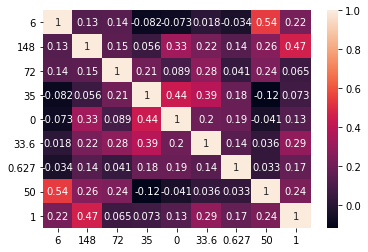

In [47]:
sns.heatmap(dataset.corr(), annot=True)

We see that all feature have some relationship with Class so we keep all of them. Plasma glucose has the strongest relationship with Class(a person having diabetes or not). Age and Body Mass Index are also strong influencers.

In [0]:
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

In [49]:
X.head(2)

,6,148,72,35,0,33.6,0.627,50
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
from keras import Sequential
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

In [0]:
model = Sequential()
model.add(Dense(8,kernel_initializer="uniform",input_dim=8))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

#Second Hidden Layer
model.add(Dense(6,kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third Hidden Layer
model.add(Dense(4,kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(1,kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
history = model.fit(X_train, y_train,
          batch_size=20,
          epochs=20,
          verbose=2,
validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)

print('\nTest loss:', score[0] * 100)
print('\n\nTest accuracy:', score[1] * 100)

Train on 536 samples, validate on 231 samples
Epoch 1/20
 - 0s - loss: 0.5769 - acc: 0.7276 - val_loss: 0.4895 - val_acc: 0.7662
Epoch 2/20
 - 0s - loss: 0.5418 - acc: 0.7463 - val_loss: 0.4892 - val_acc: 0.7792
Epoch 3/20
 - 0s - loss: 0.5559 - acc: 0.7257 - val_loss: 0.4927 - val_acc: 0.7706
Epoch 4/20
 - 0s - loss: 0.5756 - acc: 0.7090 - val_loss: 0.4914 - val_acc: 0.7835
Epoch 5/20
 - 0s - loss: 0.5601 - acc: 0.7183 - val_loss: 0.4848 - val_acc: 0.7879
Epoch 6/20
 - 0s - loss: 0.5763 - acc: 0.7146 - val_loss: 0.4830 - val_acc: 0.8009
Epoch 7/20
 - 0s - loss: 0.5590 - acc: 0.7183 - val_loss: 0.4865 - val_acc: 0.7965
Epoch 8/20
 - 0s - loss: 0.5410 - acc: 0.7407 - val_loss: 0.4877 - val_acc: 0.7922
Epoch 9/20
 - 0s - loss: 0.5613 - acc: 0.7090 - val_loss: 0.4869 - val_acc: 0.7922
Epoch 10/20
 - 0s - loss: 0.5642 - acc: 0.7052 - val_loss: 0.4901 - val_acc: 0.7879
Epoch 11/20
 - 0s - loss: 0.5543 - acc: 0.7313 - val_loss: 0.4904 - val_acc: 0.7922
Epoch 12/20
 - 0s - loss: 0.5830 - acc:

In [0]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

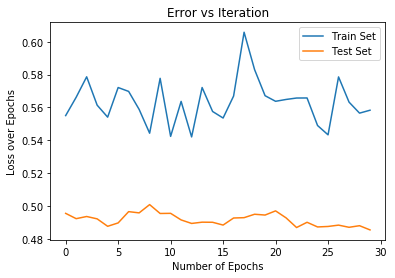

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error vs Iteration')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss over Epochs')
plt.legend(['Train Set','Test Set'],loc='upper right')
plt.show()

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[149   8]
 [ 43  31]]
